## Observations and Insights 

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
data_combined.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [245]:
# Checking the number of mice.
totCount = data_combined["Mouse ID"].nunique()
totCount

249

In [246]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeated_mice = data_combined.loc[data_combined.duplicated(subset = ["Mouse ID","Timepoint"],keep = False) == True]
repeated_mice= repeated_mice["Mouse ID"].drop_duplicates()
repeated_mice = pd.DataFrame(repeated_mice)
repeated_mice


,Mouse ID
908,g989


In [247]:
# Optional: Get all the data for the duplicate mouse ID. 
AllDuplicates = pd.DataFrame(repeated_mice)
DupeData = AllDuplicates.merge(data_combined, on = "Mouse ID")
DupeData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [248]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
main_df = data_combined.copy()
main_df = main_df.loc[~(main_df["Mouse ID"].isin(repeated_mice["Mouse ID"]))]
main_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [249]:
# Checking the number of mice in the clean DataFrame.
miceCheck = len(main_df["Mouse ID"].unique())
miceCheck

248

## Summary Statistics

In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary = pd.DataFrame({"Mean": main_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],
                              "Median": main_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],
                              "Variance": main_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],
                              "Standard Deviation": main_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],
                              "Standard Error": main_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']})
regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

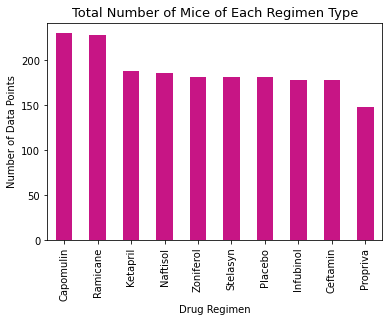

In [216]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen = main_df.groupby('Drug Regimen').count()['Mouse ID']
regimen = regimen.sort_values(ascending=False)
bar_df = pd.DataFrame(regimen)

bar_df.plot.bar(legend=False, color="mediumvioletred")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Mice of Each Regimen Type", fontsize=13)
plt.show()


Text(0.5, 1.0, 'Total Number of Mice of Each Regimen Type')

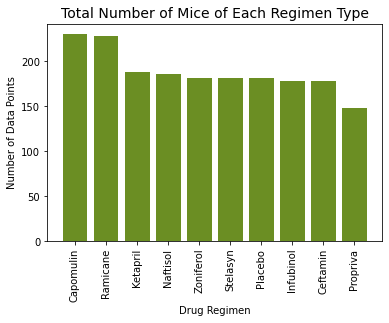

In [241]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar([x for x in np.arange(len(regimen))], bar_df['Mouse ID'],color="olivedrab")

# Formating to make it match
plt.xticks([x for x in np.arange(len(regimen))], regimen.reset_index()['Drug Regimen'],rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Mice of Each Regimen Type", fontsize=14)


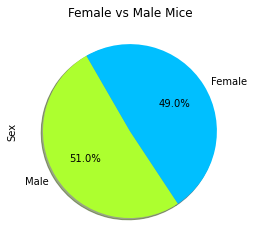

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = main_df["Sex"].value_counts()

male_female.plot(kind="pie",autopct="%1.1f%%",startangle=120, title = "Female vs Male Mice", shadow=True, colors = ['greenyellow', 'deepskyblue'])


Text(0.5, 0.97, 'Female vs Male Mice')

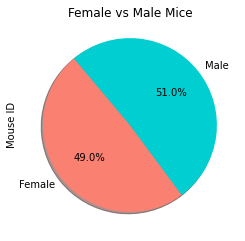

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = main_df.groupby('Sex').count()['Mouse ID']
pieChart = male_female.plot.pie(startangle=130, autopct="%1.1f%%", shadow=True, colors = ['salmon', 'darkturquoise'])
plt.title("Female vs Male Mice", fontsize=12, y=0.97)


## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_drug_data = [main_df.loc[main_df['Drug Regimen']== "Capomulin",:], main_df.loc[main_df['Drug Regimen']== "Ramicane",:], main_df.loc[main_df['Drug Regimen']== "Infubinol",:], main_df.loc[main_df['Drug Regimen']== "Ceftamin",:]]

In [221]:
# Start by getting the last (latest) timepoint for each mouse
latest_data = main_df.groupby(["Mouse ID"])['Timepoint'].max()
latest_data = latest_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorFinal = pd.merge(latest_data, main_df, on=("Mouse ID","Timepoint"),how='left')
tumorFinal.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [222]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in list_of_treats:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolumes = tumorFinal.loc[tumorFinal["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumorVolumes)
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolumes.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inner_quartile_range = quartiles[0.75]-quartiles[0.25]
    print(f"{treatment}'s potential outliers: {tumorVolumes.loc[(tumorVolumes < (lower_quartile - (1.5*(quartiles[0.75]-quartiles[0.25])))) | (tumorVolumes > (upper_quartile + (1.5*(quartiles[0.75]-quartiles[0.25]))))]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


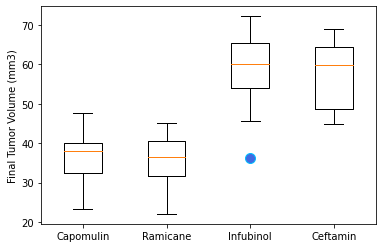

In [223]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels = list_of_treats,flierprops=dict(markerfacecolor='royalblue',markersize=10, markeredgecolor='deepskyblue'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

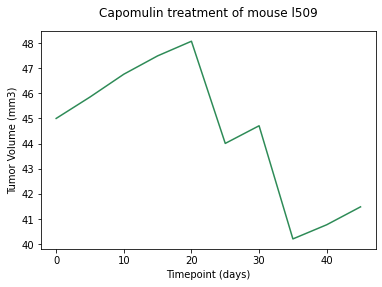

In [229]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_time_table = main_df.loc[main_df['Drug Regimen'] == "Capomulin"]
plt.plot(line_time_table.loc[line_time_table['Mouse ID']== 'l509']['Timepoint'],line_time_table.loc[line_time_table['Mouse ID']== 'l509']['Tumor Volume (mm3)'], color="seagreen")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509', y=1.04)
plt.show()

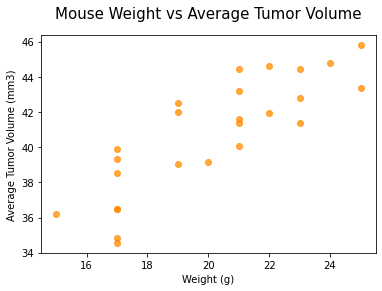

In [233]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_drug = main_df.loc[main_df['Drug Regimen'] == "Capomulin"].groupby(['Mouse ID']).mean()
plt.scatter(mean_drug['Weight (g)'], mean_drug['Tumor Volume (mm3)'],color="darkorange", alpha=0.75)
plt.xlabel('Weight (g)')
plt.title('Mouse Weight vs Average Tumor Volume', fontsize=15, y=1.05)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694717


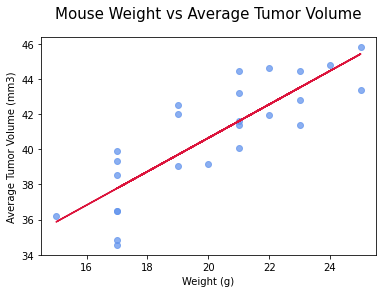

In [234]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {st.pearsonr(mean_drug['Weight (g)'], mean_drug['Tumor Volume (mm3)'])[0]}")

plt.scatter(mean_drug['Weight (g)'], mean_drug['Tumor Volume (mm3)'], color="cornflowerblue", alpha=0.75)
plt.plot(mean_drug['Weight (g)'], mean_drug['Weight (g)']*st.linregress(mean_drug['Weight (g)'], mean_drug['Tumor Volume (mm3)'])[0]+st.linregress(mean_drug['Weight (g)'], mean_drug['Tumor Volume (mm3)'])[1], color="crimson")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume', fontsize=15, y=1.06)
plt.show()